In [8]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [7]:
url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=1'
import urllib3
http = urllib3.PoolManager()
r = http.request('GET', url)
r.data

b'<?xml version="1.0" encoding="UTF-8"?>\n<feed xmlns="http://www.w3.org/2005/Atom">\n  <link href="http://arxiv.org/api/query?search_query%3Dall%3Aelectron%26id_list%3D%26start%3D0%26max_results%3D1" rel="self" type="application/atom+xml"/>\n  <title type="html">ArXiv Query: search_query=all:electron&amp;id_list=&amp;start=0&amp;max_results=1</title>\n  <id>http://arxiv.org/api/cHxbiOdZaP56ODnBPIenZhzg5f8</id>\n  <updated>2018-12-05T00:00:00-05:00</updated>\n  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">139970</opensearch:totalResults>\n  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>\n  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">1</opensearch:itemsPerPage>\n  <entry>\n    <id>http://arxiv.org/abs/cond-mat/0102536v1</id>\n    <updated>2001-02-28T20:12:09Z</updated>\n    <published>2001-02-28T20:12:09Z</published>\n    <title>Impact of Electron-Electron C

In [10]:
with open('./data/mag_list_noid.json', 'r') as f:
    mag_list = json.load(f, encoding='utf-8')

In [12]:
cs_cnt = 0
phy_cnt = 0
na_cnt = 0
for row in mag_list:
    if row['field'] == 'Computer Science':
        cs_cnt += 1
    elif row['field'] == 'Physics':
        phy_cnt += 1
    else:
        na_cnt += 1

In [13]:
cs_cnt, phy_cnt, na_cnt

(4848237, 6915527, 0)

In [164]:
df = pd.read_csv('./data/predi_result_1w.csv').set_index('nid')

In [165]:
df.head()

,cite_2014,kw_mean_2014,author_score_2014,cite_2015,kw_mean_2015,author_score_2015,cite_2016,kw_mean_2016,author_score_2016,cite_2017,kw_mean_2017,author_score_2017,cite_2017_predi
nid,,,,,,,,,,,,,
0,12,29040.222222,1.016243,3,28599.444444,0.993414,4,22924.888889,0.374119,0,5704.444444,0.590087,1.377743
1,0,63007.500000,-0.219228,0,62395.500000,-0.281703,0,50758.500000,-0.223053,0,12445.500000,-0.092329,0.030429
2,0,37642.285714,0.175017,0,37914.571429,-0.281703,0,33353.857143,0.480454,0,14270.142857,-0.092329,0.031250
3,1,26045.636364,0.374668,0,26330.909091,-0.204240,0,21744.090909,0.238670,0,5644.272727,0.150741,0.016687
4,0,27728.200000,-0.170044,0,27791.800000,-0.173639,0,24303.000000,-0.209063,0,10460.600000,-0.074425,0.030808


In [166]:
df['diff'] = (df['cite_2017_predi'] - df['cite_2017'])**2

In [167]:
df['diff'].describe()

count    10001.000000
mean         0.426080
std          8.088412
min          0.000003
25%          0.000948
50%          0.000958
75%          0.050580
max        679.515892
Name: diff, dtype: float64

In [168]:
diff = list(df['diff'])

In [169]:
diff.sort()

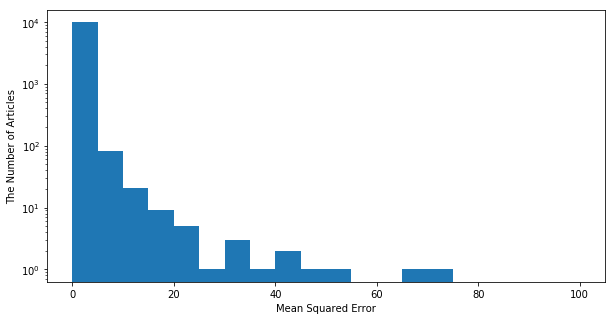

In [180]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(diff, bins=20, range=(0, 100), density=False, log=True)
plt.xlabel('Mean Squared Error')
plt.ylabel('The Number of Articles')
# plt.title(r'Research Popularity Change')
plt.show()

In [49]:
with open('./data/keyword_year_new.json', 'r') as f:
    keyword = json.load(f, encoding='utf-8')

In [51]:
keyword.keys()

dict_keys(['natural language processing', 'social science', 'computer science', 'multimedia', 'sociology', 'reciprocal teaching', 'data analysis', 'exploratory research', 'pedagogy', 'embedded system', 'parallel computing', 'computer hardware', 'weak isospin', 'neutrino oscillation', 'weak interaction', 'quantum electrodynamics', 'particle physics', 'physics', 'quantum mechanics', 'psychology', 'cognitive psychology', 'epistemology', 'artificial intelligence', 'mathematics', 'linguistics', 'social psychology', 'anthropology', 'cognitive science', 'phase transition', 'closed-form expression', 'symmetry breaking', 'lattice gauge theory', 'chiral symmetry breaking', 'lattice field theory', 'condensed matter physics', 'hubbard model', 'saddle point', 'second-order logic', 'phase diagram', 'membership function', 'knowledge management', 'information security', 'access control', 'computational intelligence', 'data mining', 'authorization', 'fuzzy set', 'computer security', 'certificate author

In [104]:
nlp = keyword['deep learning']

In [105]:
cn = keyword['java']

In [106]:
nd = keyword['nuclear reaction']

In [110]:
gr = keyword['general relativity']

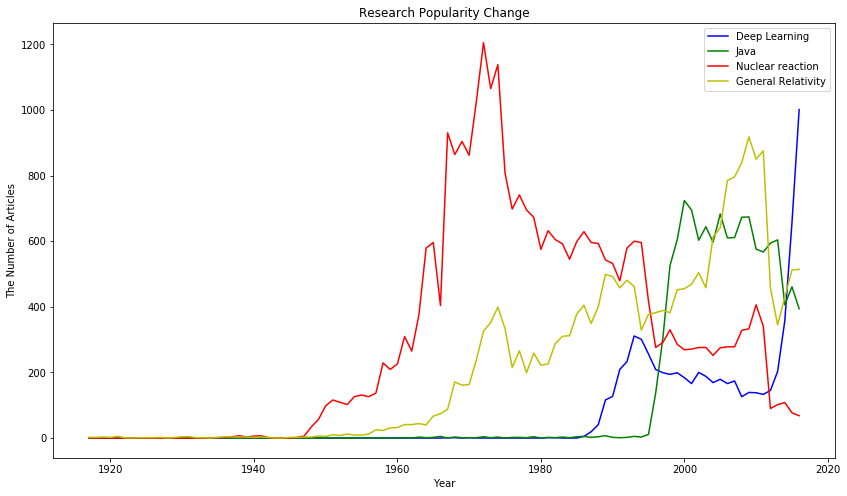

In [123]:
plt.figure(num=None, figsize=(14, 8))
x = range(1917,2017)
plt.plot(x, nlp[-102:-2], 'b', x, cn[-102:-2], 'g', x, nd[-102:-2], 'r', x, gr[-102:-2], 'y')
plt.xlabel('Year')
plt.ylabel('The Number of Articles')
plt.title(r'Research Popularity Change')
plt.legend(('Deep Learning', 'Java', 'Nuclear reaction', 'General Relativity'),
           loc='upper right')
plt.show()

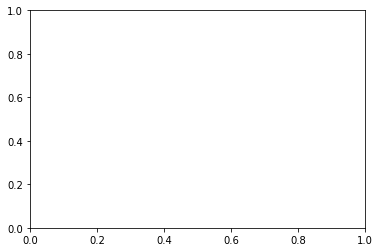

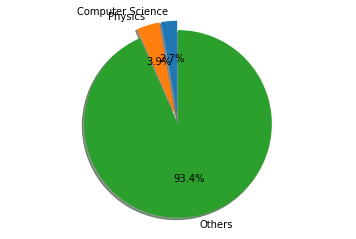

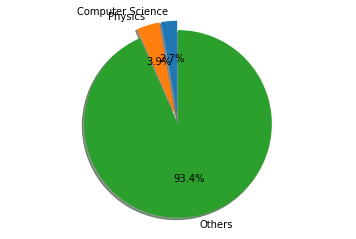

In [126]:
labels = 'Computer Science', 'Physics', 'Others'
sizes = [4848237,  6915527, 166192182]
explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [130]:
with open('./data/pagerank_3_2.json', 'r') as f:
    rs = json.load(f, encoding='utf-8')

In [134]:
x = []
y = []
z = []
for r in rs:
    x.append(len(rs[r]['cited']))
    z.append(rs[r]['rank_score']*1e8)

In [136]:
for row in mag_list:
    y.append(row['year'])

In [137]:
len(x), len(y), len(z)

(11763764, 11763764, 11763764)

In [189]:
zc = []
zmax = max(z)
zmed = np.median(z)
for zz in z:
    zc.append(min(zz*2/zmed*255, 255))

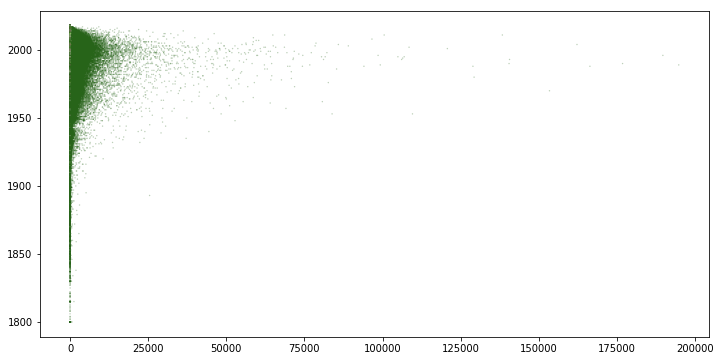

In [190]:
import matplotlib.cm as cm
# delta = 0.025
# x = y = np.arange(-3.0, 3.0, delta)
# X, Y = np.meshgrid(x, y)
# Z1 = np.exp(-X**2 - Y**2)
# Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
# Z = (Z1 - Z2) * 2

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(x, y, c=zc,s=2, cmap='PiYG',
           alpha=0.3, edgecolors='none')
# im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
#                origin='lower', extent=[min(x), max(x), min(y), max(y)],
#                vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

In [157]:
cnt_list = [0]*219
for row in mag_list:
    cnt_list[row['year']-1900] += 1

In [158]:
cnt_list1 = np.log1p(cnt_list)

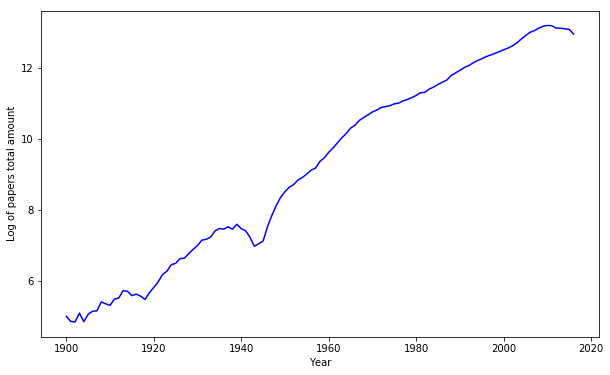

In [162]:
plt.figure(num=None, figsize=(10, 6))
plt.plot(range(1900, 2017), cnt_list1[:-102], 'b')
plt.xlabel('Year')
plt.ylabel('Log of papers total amount')
plt.show()

In [191]:
cor_df = pd.DataFrame(
    {'n_citation': x,
     'year': y,
     'rank_score': z
    })


In [192]:
cor_df.corr()

,n_citation,year,rank_score
n_citation,1.000000,-0.056489,0.591164
year,-0.056489,1.000000,-0.122491
rank_score,0.591164,-0.122491,1.000000
